# Démonstration KNN 2 paramètres en utilisant la base IRIS

## Importation des Bibliothèques:

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Chargement de la base de données Iris:

In [104]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend seulement les deux premières caractéristiques pour la visualisation
y = iris.target

  # Normalisation des données:

In [105]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparation en train/test:

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entraînement du SVM avec noyau RBF

In [107]:
svm = SVC(kernel='rbf', C=2, gamma=1)
svm.fit(X_train, y_train)

SVC(C=2, gamma=1)

# Prédictions

In [108]:
y_pred = svm.predict(X_test)    

# Calcul de la matrice de confusion

In [109]:
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion

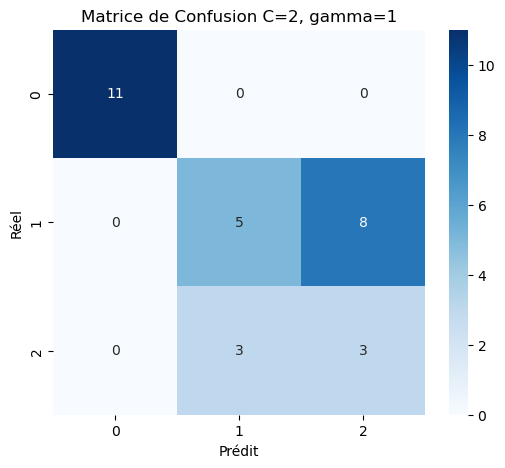

In [110]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion C=2, gamma=1')
    plt.show()

# Affichage de la matrice de confusion
afficher_matrice_confusion(cm, np.unique(y))

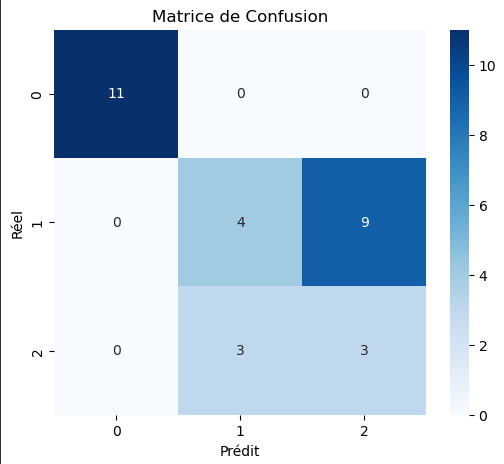
*Matrice de confusion pour C=10*

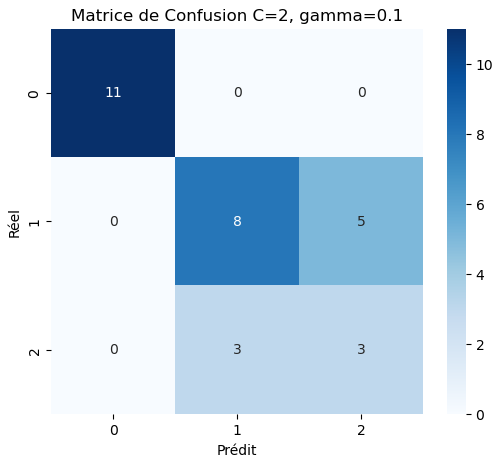
*Matrice de confusion pour gamma=0.1*

# Affichage de la frontière de décision

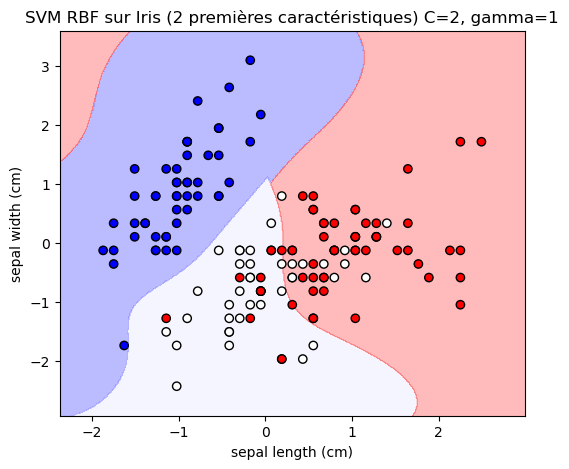

In [111]:
def afficher_frontiere_decision(X, y, model, feature_names):
    """Affiche la frontière de décision."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF sur Iris (2 premières caractéristiques) C=2, gamma=1")
    plt.show()

afficher_frontiere_decision(X, y, svm, iris.feature_names)



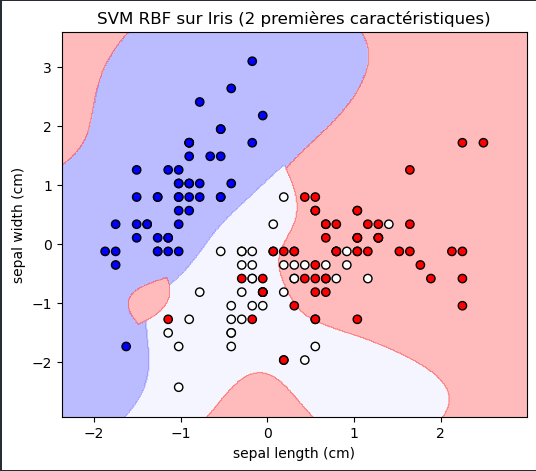
*Affichage de la frontière pour C=10*


On voit bien ici que **C** qui est un paramètre de régularisation permet de contrôler la complexité du modèle. Plus **C** est grand, moins la marge est petite ce qui permet d'avoir une meilleure classification tandis que si **C** est petit, la marge est grande ce qui permet de rendre le modèle plus tolérant même si cela peut mener à quelques erreurs.

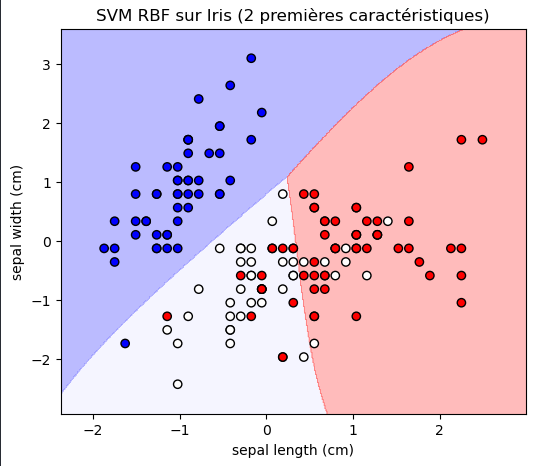
*Affichage de la frontière pour gamma=0.1*

On peut voir ici que **gamma** qui est un paramètre qui permet de contrôler la simplicité du modèle. Plus **gamma** est petit, plus les frontières de décision sont lisses et plus **gamma** est grand, plus les frontières de décision sont complexes.